# Calculating pi using Monte Carlo methods

Here are the equations used in this exercise:

 - square area = $(2 r)^2$
 - circle area = $\pi r^2$
 - circle / square = $\pi r^2 / 4 r^2$ = $\pi / 4$
 - $\pi$ = 4 * (circle/square)

Here is an image which explains the exercise:

![Darts](https://coderefinery.github.io/jupyter/img/darts.svg)

Import random and ipywidgets module:

In [7]:
import random

Initialize variables:

In [8]:
N = 1000
points = []

“Throw darts”:

In [9]:
hits = 0
for i in range(N):
    x, y = random.random(), random.random()
    if x**2 + y**2 < 1.0:
        hits += 1
        points.append((x, y, True))
    else:
        points.append((x, y, False))

Plot results:

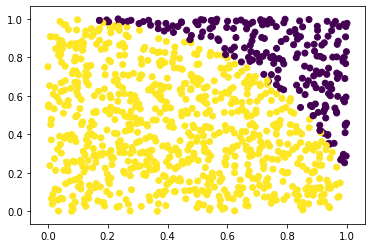

In [10]:
%matplotlib inline
from matplotlib import pyplot
x, y, colors = zip(*points)
pyplot.scatter(x, y, c=colors)

Compute final estimate of pi:

In [11]:
fraction = hits / N
4 * fraction

3.148

Widgets add more interactivity to Notebooks, allowing one to visualize and control changes in data, parameters etc.

Use interact as a function

In [12]:
from ipywidgets import interact

In [13]:
def f(x, y, s):
    return (x, y, s)

interact(f, x=True, y=1.0, s="Hello");

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

Use interact as a decorator

In [14]:
@interact(x=True, y=1.0, s="Hello")
def g(x, y, s):
    return (x, y, s)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

In [15]:
@interact
def plot_points(n=(1,10)):
    # we plot every n-th point
    x, y, colors = zip(*points[::n])
    pyplot.scatter(x, y, c=colors)

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

In [16]:
import numpy as np

from ipywidgets import interact

import matplotlib.pyplot as plt
%matplotlib inline

def gaussian(x, a, b, c):
    return a * np.exp(-b * (x-c)**2)

def noisy_gaussian():
    # gaussian array y in interval -5 <= x <= 5
    nx = 100
    x = np.linspace(-5.0, 5.0, nx)
    y = gaussian(x, a=2.0, b=0.5, c=1.5)
    noise = np.random.normal(0.0, 0.2, nx)
    y += noise
    return x, y

def fit(x, y, n):
    pfit = np.polyfit(x, y, n)
    yfit = np.polyval(pfit, x)
    return yfit

def plot(x, y, yfit):
    plt.plot(x, y, "r", label="Data")
    plt.plot(x, yfit, "b", label="Fit")
    plt.legend()
    plt.ylim(-0.5, 2.5)
    plt.show()

x, y = noisy_gaussian()

@interact
def slider(n=(3, 30)):
    yfit = fit(x, y, n)
    plot(x, y, yfit)

interactive(children=(IntSlider(value=16, description='n', max=30, min=3), Output()), _dom_classes=('widget-in…